# Data Cleaning

In [72]:
import pandas as pd
import numpy as np

## 03_01 - Checking and handling missing values in the data

In [73]:
df = pd.read_csv("./data/catalog.csv")
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [75]:
df.describe()

,id,population,fatalities
count,1693.000000,1.693000e+03,1446.000000
mean,4145.027761,9.345940e+04,1.459198
std,2236.741960,5.226016e+05,9.184653
min,34.000000,0.000000e+00,0.000000
25%,2330.000000,2.080000e+03,0.000000
50%,4087.000000,5.785000e+03,0.000000
75%,6098.000000,1.886700e+04,0.000000
max,7541.000000,1.229419e+07,280.000000


## 03_01 Handling missing values in the data

- Drop rows where you have missing values in the date column.
- Fill missing values with specific values
- Fill automatic

In [76]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [77]:
df = df[~df['date'].isnull()]
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [78]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [79]:
df['time'] = df['time'].fillna("Not known!")

In [80]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Not known!,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Not known!,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Not known!,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Not known!,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not known!,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,Not known!,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [81]:
df['time'].value_counts()

Not known!       1064
Night              97
Morning            87
Afternoon          58
Early morning      36
                 ... 
1:13                1
9:40:00             1
11:50:00            1
                    1
21:06               1
Name: time, Length: 160, dtype: int64

In [82]:
df['fatalities'].isna().sum()

247

<AxesSubplot:>

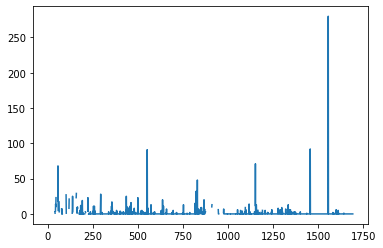

In [83]:
df['fatalities'].plot()

In [84]:
median = df['fatalities'].mean()
df['fatalities'] = df['fatalities'].fillna(median)
df['fatalities'].mean()

1.4622314622314672

In [85]:
df['date'].isna().sum()

0

## 03_02 - Parse dates 
- Convert our date columns to datetime
- extract month from the date
- Plot a histogram to show the number of landslides in every month

In [ ]:
df.info()

In [ ]:
# create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['date'], format="%m/%d/%y")

In [ ]:
df['date_parsed'].head()

In [ ]:
# get the day of the month from the date_parsed column
month_of_landslides = df['date_parsed'].dt.month

month_of_landslides.head()


In [ ]:
import seaborn as sns
# remove na's
month_of_landslides = month_of_landslides.dropna()

# plot the day of the month
sns.distplot(month_of_landslides, kde=False, bins=12)

## 03_03 - Correcting the data format

In [87]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not known!,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not known!,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not known!,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not known!,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not known!,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not known!,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [89]:
df['time'].value_counts()[0:10]

Not known!       1064
Night              97
Morning            87
Afternoon          58
Early morning      36
3:00:00            12
Evening            10
19:00:00            9
evening             8
18:00:00            8
Name: time, dtype: int64

In [112]:
def format_time(x):
    if ':' in x.lower():
        if int(x.split(':')[0]) >= 12 and int(x.split(':')[0]) < 18:
            x = "Afternoon"
        elif int(x.split(':')[0]) < 12:
            x = "Morning"
        elif int(x.split(':')[0]) >= 18:
            x = "Night"
    

    return x

In [119]:
def format_time(x):
    if ':' in x.lower():
        if int(x.split(':')[0]) >= 12 and int(x.split(':')[0]) < 18:
            x = "Afternoon"
        elif int(x.split(':')[0]) < 12:
            x = "Morning"
        elif int(x.split(':')[0]) >= 18:
            x = "Night"
    elif 'evening' in x.lower():
        x = "Evening"
    elif 'morning' in x.lower() or 'dawn' in x.lower():
        x = "Morning"
    elif 'afternoon' in x.lower():
        x = "Afternoon"
    elif 'night' in x.lower():
        x = "Night"
    else:
        x = "Not Known!"
    return x

In [120]:
df['time'] = df['time'].apply(format_time)

In [121]:
df['time'].value_counts()

Not Known!    1067
Morning        265
Night          194
Afternoon      145
Evening         19
Name: time, dtype: int64